Generating Line Plots and Bar Graphs...


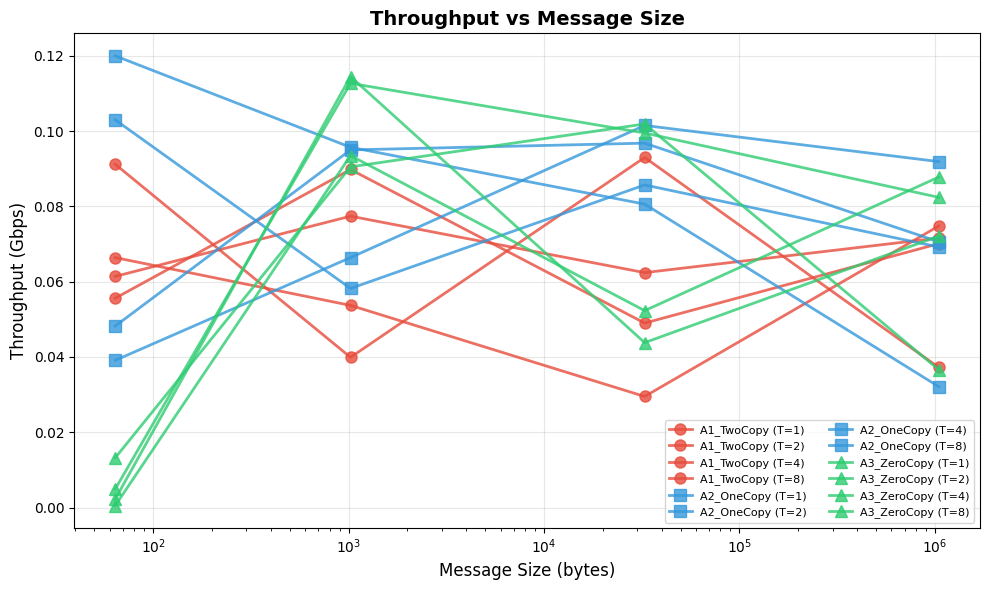

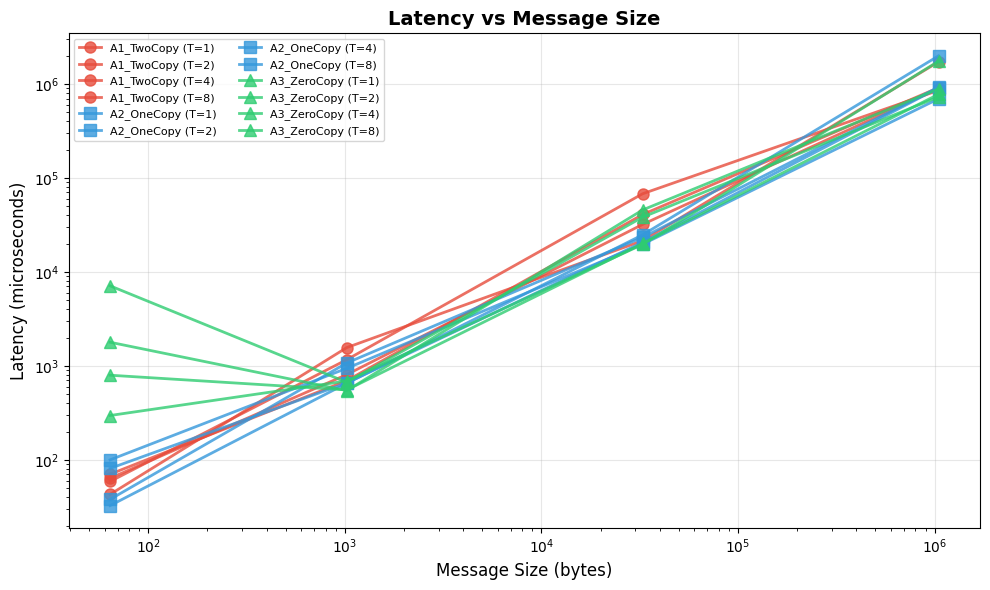

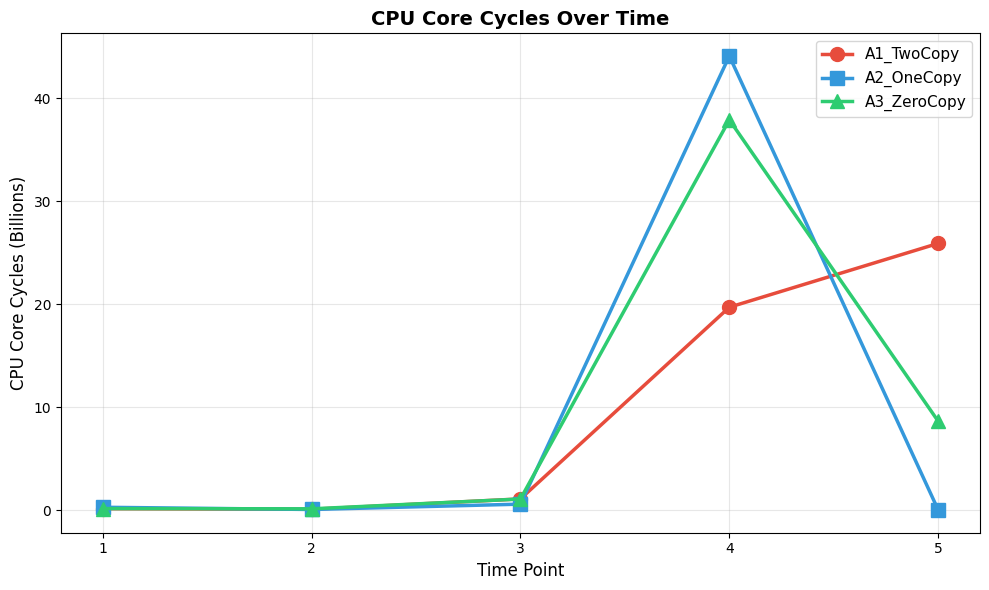

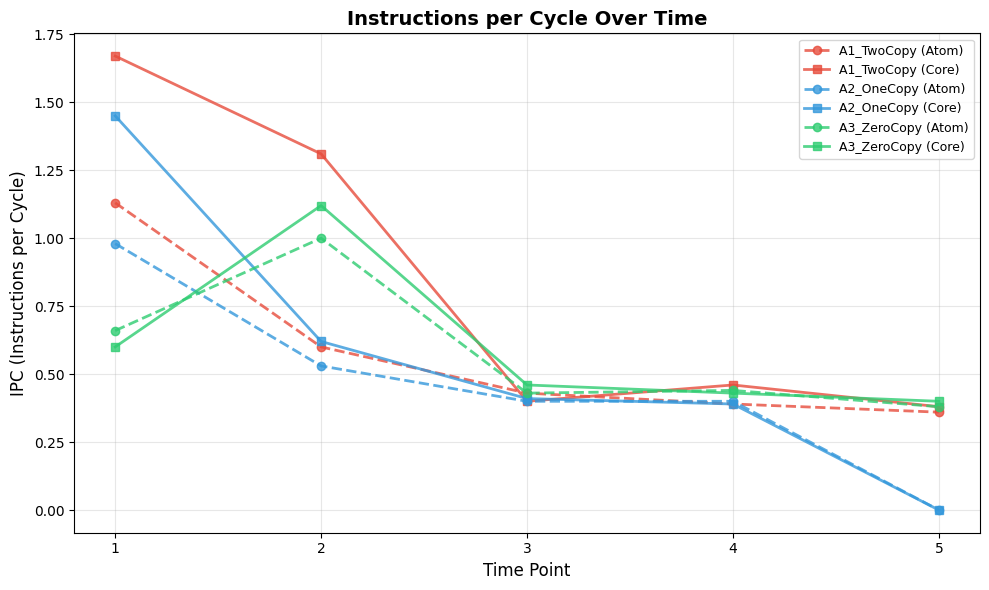

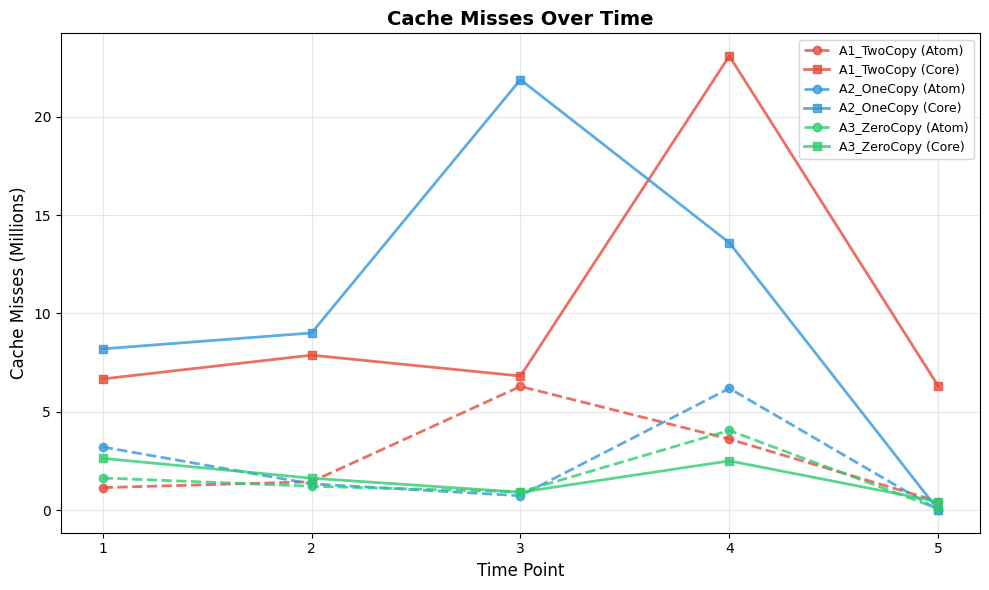

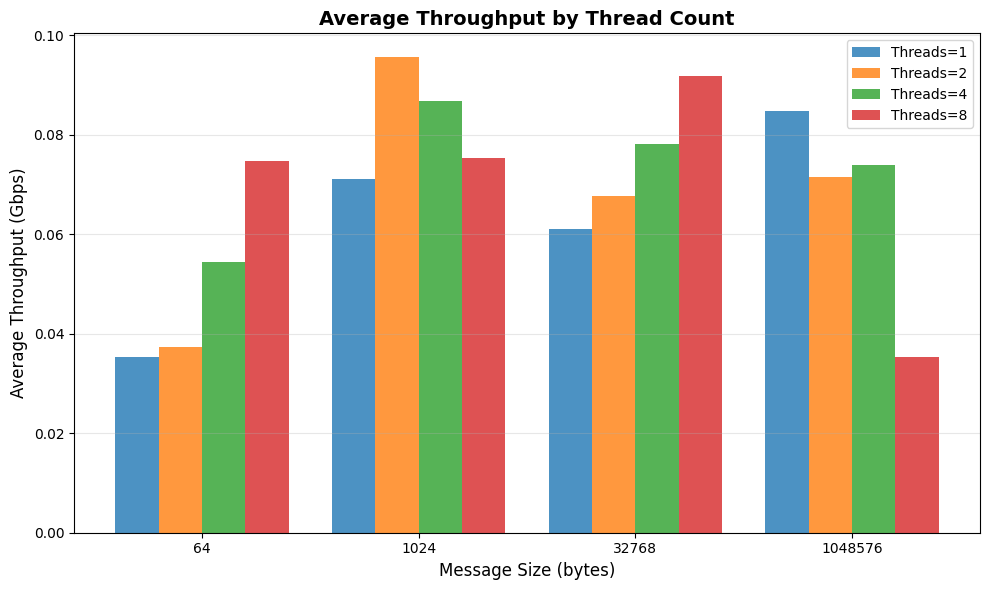

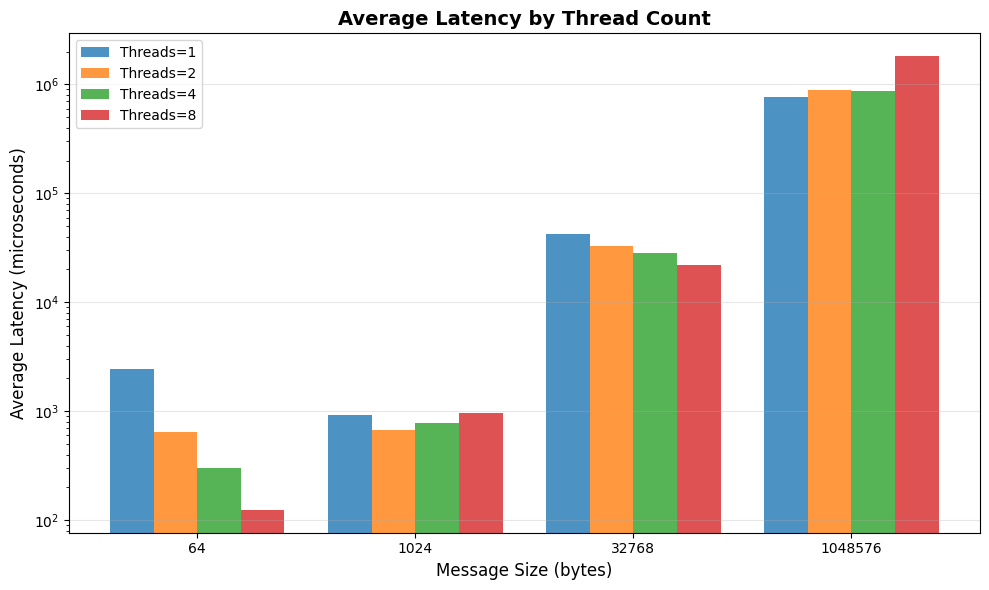

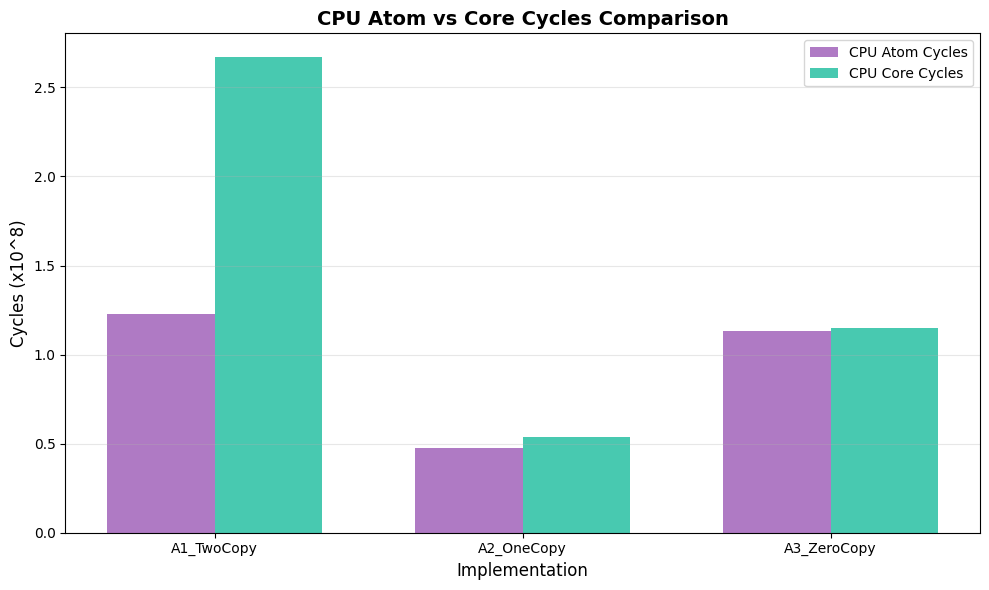

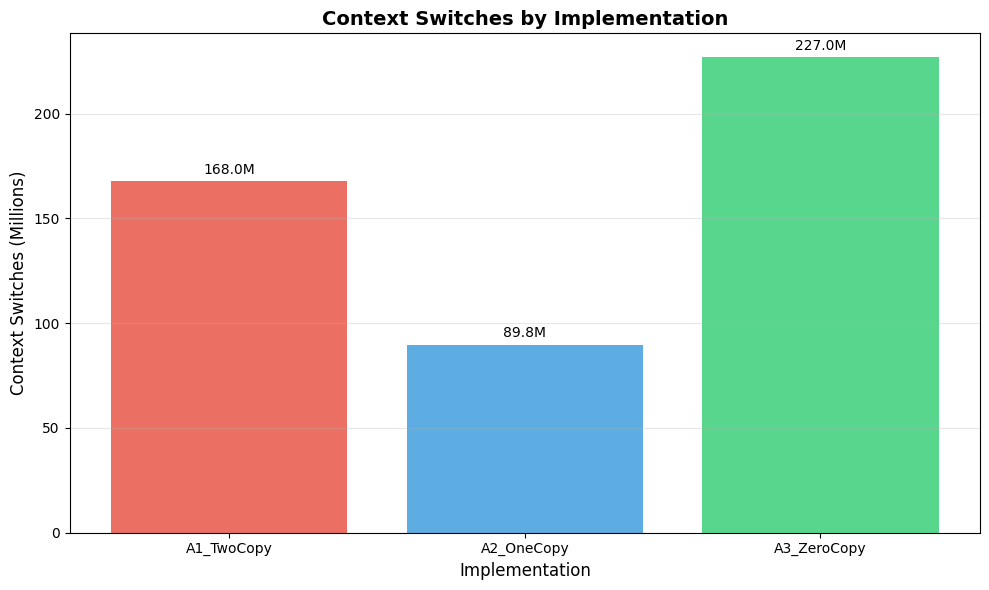

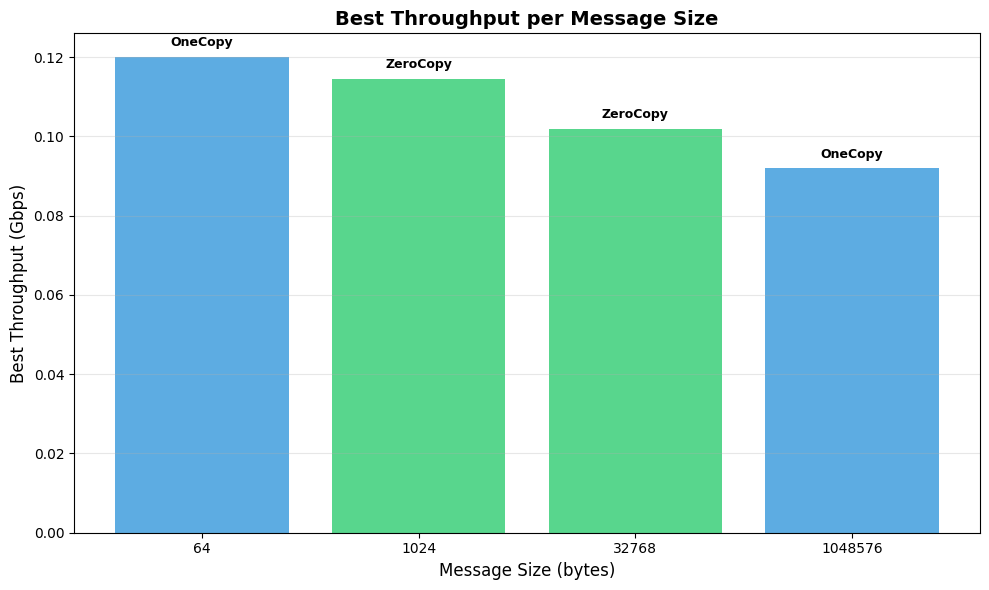

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import warnings

warnings.filterwarnings('ignore')

# ==========================================
# 1. Client Throughput & Latency Data
# ==========================================
client_data_hardcoded = [
    {'Implementation': 'A1_TwoCopy', 'MessageSize': 64, 'Threads': 1, 'Throughput(Gbps)': 0.0664, 'Latency(us)': 58.8188},
    {'Implementation': 'A1_TwoCopy', 'MessageSize': 64, 'Threads': 2, 'Throughput(Gbps)': 0.0614, 'Latency(us)': 63.589},
    {'Implementation': 'A1_TwoCopy', 'MessageSize': 64, 'Threads': 4, 'Throughput(Gbps)': 0.0556, 'Latency(us)': 70.2651},
    {'Implementation': 'A1_TwoCopy', 'MessageSize': 64, 'Threads': 8, 'Throughput(Gbps)': 0.0912, 'Latency(us)': 42.8352},
    {'Implementation': 'A1_TwoCopy', 'MessageSize': 1024, 'Threads': 1, 'Throughput(Gbps)': 0.0537, 'Latency(us)': 1164.7812},
    {'Implementation': 'A1_TwoCopy', 'MessageSize': 1024, 'Threads': 2, 'Throughput(Gbps)': 0.0774, 'Latency(us)': 807.8737},
    {'Implementation': 'A1_TwoCopy', 'MessageSize': 1024, 'Threads': 4, 'Throughput(Gbps)': 0.0898, 'Latency(us)': 695.9857},
    {'Implementation': 'A1_TwoCopy', 'MessageSize': 1024, 'Threads': 8, 'Throughput(Gbps)': 0.0399, 'Latency(us)': 1565.311},
    {'Implementation': 'A1_TwoCopy', 'MessageSize': 32768, 'Threads': 1, 'Throughput(Gbps)': 0.0295, 'Latency(us)': 67909.0266},
    {'Implementation': 'A1_TwoCopy', 'MessageSize': 32768, 'Threads': 2, 'Throughput(Gbps)': 0.0624, 'Latency(us)': 32053.5896},
    {'Implementation': 'A1_TwoCopy', 'MessageSize': 32768, 'Threads': 4, 'Throughput(Gbps)': 0.049, 'Latency(us)': 40837.9405},
    {'Implementation': 'A1_TwoCopy', 'MessageSize': 32768, 'Threads': 8, 'Throughput(Gbps)': 0.093, 'Latency(us)': 21504.0949},
    {'Implementation': 'A1_TwoCopy', 'MessageSize': 1048576, 'Threads': 1, 'Throughput(Gbps)': 0.0748, 'Latency(us)': 855696.6661},
    {'Implementation': 'A1_TwoCopy', 'MessageSize': 1048576, 'Threads': 2, 'Throughput(Gbps)': 0.0716, 'Latency(us)': 894294.1601},
    {'Implementation': 'A1_TwoCopy', 'MessageSize': 1048576, 'Threads': 4, 'Throughput(Gbps)': 0.0701, 'Latency(us)': 913327.6949},
    {'Implementation': 'A1_TwoCopy', 'MessageSize': 1048576, 'Threads': 8, 'Throughput(Gbps)': 0.0372, 'Latency(us)': 1721308.9996},
    {'Implementation': 'A2_OneCopy', 'MessageSize': 64, 'Threads': 1, 'Throughput(Gbps)': 0.0391, 'Latency(us)': 99.9315},
    {'Implementation': 'A2_OneCopy', 'MessageSize': 64, 'Threads': 2, 'Throughput(Gbps)': 0.0482, 'Latency(us)': 81.0177},
    {'Implementation': 'A2_OneCopy', 'MessageSize': 64, 'Threads': 4, 'Throughput(Gbps)': 0.103, 'Latency(us)': 37.9107},
    {'Implementation': 'A2_OneCopy', 'MessageSize': 64, 'Threads': 8, 'Throughput(Gbps)': 0.12, 'Latency(us)': 32.5489},
    {'Implementation': 'A2_OneCopy', 'MessageSize': 1024, 'Threads': 1, 'Throughput(Gbps)': 0.0664, 'Latency(us)': 941.9678},
    {'Implementation': 'A2_OneCopy', 'MessageSize': 1024, 'Threads': 2, 'Throughput(Gbps)': 0.095, 'Latency(us)': 657.7498},
    {'Implementation': 'A2_OneCopy', 'MessageSize': 1024, 'Threads': 4, 'Throughput(Gbps)': 0.0582, 'Latency(us)': 1073.8959},
    {'Implementation': 'A2_OneCopy', 'MessageSize': 1024, 'Threads': 8, 'Throughput(Gbps)': 0.0957, 'Latency(us)': 652.9876},
    {'Implementation': 'A2_OneCopy', 'MessageSize': 32768, 'Threads': 1, 'Throughput(Gbps)': 0.1015, 'Latency(us)': 19707.6783},
    {'Implementation': 'A2_OneCopy', 'MessageSize': 32768, 'Threads': 2, 'Throughput(Gbps)': 0.0968, 'Latency(us)': 20659.6759},
    {'Implementation': 'A2_OneCopy', 'MessageSize': 32768, 'Threads': 4, 'Throughput(Gbps)': 0.0857, 'Latency(us)': 23340.2532},
    {'Implementation': 'A2_OneCopy', 'MessageSize': 32768, 'Threads': 8, 'Throughput(Gbps)': 0.0806, 'Latency(us)': 24807.2945},
    {'Implementation': 'A2_OneCopy', 'MessageSize': 1048576, 'Threads': 1, 'Throughput(Gbps)': 0.0919, 'Latency(us)': 696110.1581},
    {'Implementation': 'A2_OneCopy', 'MessageSize': 1048576, 'Threads': 2, 'Throughput(Gbps)': 0.0706, 'Latency(us)': 906695.0839},
    {'Implementation': 'A2_OneCopy', 'MessageSize': 1048576, 'Threads': 4, 'Throughput(Gbps)': 0.0692, 'Latency(us)': 925186.0627},
    {'Implementation': 'A2_OneCopy', 'MessageSize': 1048576, 'Threads': 8, 'Throughput(Gbps)': 0.0321, 'Latency(us)': 1993474.9558},
    {'Implementation': 'A3_ZeroCopy', 'MessageSize': 64, 'Threads': 1, 'Throughput(Gbps)': 0.0005, 'Latency(us)': 7111.7433},
    {'Implementation': 'A3_ZeroCopy', 'MessageSize': 64, 'Threads': 2, 'Throughput(Gbps)': 0.0022, 'Latency(us)': 1784.3999},
    {'Implementation': 'A3_ZeroCopy', 'MessageSize': 64, 'Threads': 4, 'Throughput(Gbps)': 0.0049, 'Latency(us)': 795.3235},
    {'Implementation': 'A3_ZeroCopy', 'MessageSize': 64, 'Threads': 8, 'Throughput(Gbps)': 0.0132, 'Latency(us)': 296.2941},
    {'Implementation': 'A3_ZeroCopy', 'MessageSize': 1024, 'Threads': 1, 'Throughput(Gbps)': 0.0935, 'Latency(us)': 668.6345},
    {'Implementation': 'A3_ZeroCopy', 'MessageSize': 1024, 'Threads': 2, 'Throughput(Gbps)': 0.1145, 'Latency(us)': 545.6664},
    {'Implementation': 'A3_ZeroCopy', 'MessageSize': 1024, 'Threads': 4, 'Throughput(Gbps)': 0.1127, 'Latency(us)': 554.548},
    {'Implementation': 'A3_ZeroCopy', 'MessageSize': 1024, 'Threads': 8, 'Throughput(Gbps)': 0.0905, 'Latency(us)': 690.6457},
    {'Implementation': 'A3_ZeroCopy', 'MessageSize': 32768, 'Threads': 1, 'Throughput(Gbps)': 0.0523, 'Latency(us)': 38247.9837},
    {'Implementation': 'A3_ZeroCopy', 'MessageSize': 32768, 'Threads': 2, 'Throughput(Gbps)': 0.0438, 'Latency(us)': 45670.8322},
    {'Implementation': 'A3_ZeroCopy', 'MessageSize': 32768, 'Threads': 4, 'Throughput(Gbps)': 0.0995, 'Latency(us)': 20094.0239},
    {'Implementation': 'A3_ZeroCopy', 'MessageSize': 32768, 'Threads': 8, 'Throughput(Gbps)': 0.1019, 'Latency(us)': 19628.749},
    {'Implementation': 'A3_ZeroCopy', 'MessageSize': 1048576, 'Threads': 1, 'Throughput(Gbps)': 0.0878, 'Latency(us)': 729261.1357},
    {'Implementation': 'A3_ZeroCopy', 'MessageSize': 1048576, 'Threads': 2, 'Throughput(Gbps)': 0.0721, 'Latency(us)': 887229.8756},
    {'Implementation': 'A3_ZeroCopy', 'MessageSize': 1048576, 'Threads': 4, 'Throughput(Gbps)': 0.0824, 'Latency(us)': 777066.5415},
    {'Implementation': 'A3_ZeroCopy', 'MessageSize': 1048576, 'Threads': 8, 'Throughput(Gbps)': 0.0366, 'Latency(us)': 1749540.0803}
]
client_df = pd.DataFrame(client_data_hardcoded)

# ==========================================
# 2. Perf Profiling Data (A1, A2, A3)
# ==========================================
a1_perf_raw = """
Time,CounterValue,Unit,EventName,RunTime,Percentage,MetricValue,MetricUnit
60.060072746,236032223,,cpu_atom/cycles/,34809631,62.00,,
60.060072746,949862314,,cpu_core/cycles/,133790082,79.00,,
60.060072746,266837739,,cpu_atom/instructions/,34809631,62.00,1.13,insn per cycle
60.060072746,1584200803,,cpu_core/instructions/,133790082,79.00,1.67,insn per cycle
60.060072746,<not supported>,,cpu_atom/L1-dcache-load-misses/,0,100.00,,
60.060072746,1835750,,cpu_core/L1-dcache-load-misses/,133790082,79.00,,
60.060072746,1141556,,cpu_atom/cache-misses/,34809631,62.00,,
60.060072746,6672912,,cpu_core/cache-misses/,133790082,79.00,,
60.060072746,519,,context-switches,168599713,100.00,,
120.095053185,90068518,,cpu_atom/cycles/,17523772,78.00,,
120.095053185,494325190,,cpu_core/cycles/,72307169,80.00,,
120.095053185,54244281,,cpu_atom/instructions/,17523772,78.00,0.60,insn per cycle
120.095053185,646729789,,cpu_core/instructions/,72307169,80.00,1.31,insn per cycle
120.095053185,<not supported>,,cpu_atom/L1-dcache-load-misses/,0,100.00,,
120.095053185,4138633,,cpu_core/L1-dcache-load-misses/,72307169,80.00,,
120.095053185,1443097,,cpu_atom/cache-misses/,17523772,78.00,,
120.095053185,7876071,,cpu_core/cache-misses/,72307169,80.00,,
120.095053185,540,,context-switches,89830941,100.00,,
180.096874908,5249039197,,cpu_atom/cycles/,292872095,21.00,,
180.096874908,6499215517,,cpu_core/cycles/,1084280124,79.00,,
180.096874908,2258910649,,cpu_atom/instructions/,292872095,21.00,0.43,insn per cycle
180.096874908,2627486185,,cpu_core/instructions/,1084280124,79.00,0.40,insn per cycle
180.096874908,<not supported>,,cpu_atom/L1-dcache-load-misses/,0,100.00,,
180.096874908,24916535,,cpu_core/L1-dcache-load-misses/,1084280124,79.00,,
180.096874908,6289298,,cpu_atom/cache-misses/,292872095,21.00,,
180.096874908,6817536,,cpu_core/cache-misses/,1084280124,79.00,,
180.096874908,192107,,context-switches,1377152219,100.00,,
240.156789403,57820653438,,cpu_atom/cycles/,842673280,5.00,,
240.156789403,99503537237,,cpu_core/cycles/,19750818717,95.00,,
240.156789403,22513180006,,cpu_atom/instructions/,842673280,5.00,0.39,insn per cycle
240.156789403,45905528337,,cpu_core/instructions/,19750871346,95.00,0.46,insn per cycle
240.156789403,<not supported>,,cpu_atom/L1-dcache-load-misses/,0,100.00,,
240.156789403,266187209,,cpu_core/L1-dcache-load-misses/,19750914340,95.00,,
240.156789403,3606583,,cpu_atom/cache-misses/,842673280,5.00,,
240.156789403,23052098,,cpu_core/cache-misses/,19750955759,95.00,,
240.156789403,2775183,,context-switches,20593657950,100.00,,
257.537857266,72413833804,,cpu_atom/cycles/,461789160,2.00,,
257.537857266,124679414925,,cpu_core/cycles/,25964619918,98.00,,
257.537857266,26142519953,,cpu_atom/instructions/,461789160,2.00,0.36,insn per cycle
257.537857266,46971801006,,cpu_core/instructions/,25964567289,98.00,0.38,insn per cycle
257.537857266,<not supported>,,cpu_atom/L1-dcache-load-misses/,0,100.00,,
257.537857266,342485254,,cpu_core/L1-dcache-load-misses/,25964524295,98.00,,
257.537857266,432788,,cpu_atom/cache-misses/,461789160,2.00,,
257.537857266,6314399,,cpu_core/cache-misses/,25964482876,98.00,,
257.537857266,4161852,,context-switches,26426243125,100.00,,
"""

a2_perf_raw = """
Time,CounterValue,Unit,EventName,RunTime,Percentage,MetricValue,MetricUnit
60.007485704,960274000,,cpu_atom/cycles/,47667058,21.00,,
60.007485704,1769024552,,cpu_core/cycles/,267399097,85.00,,
60.007485704,941643527,,cpu_atom/instructions/,47667058,21.00,0.98,insn per cycle
60.007485704,2561434008,,cpu_core/instructions/,267399097,85.00,1.45,insn per cycle
60.007485704,<not supported>,,cpu_atom/L1-dcache-load-misses/,0,100.00,,
60.007485704,2055954,,cpu_core/L1-dcache-load-misses/,267399097,85.00,,
60.007485704,3212810,,cpu_atom/cache-misses/,47667058,21.00,,
60.007485704,8201284,,cpu_core/cache-misses/,267399097,85.00,,
60.007485704,1009,,context-switches,315066155,100.00,,
120.067803868,92730183,,cpu_atom/cycles/,17310842,75.00,,
120.067803868,375070230,,cpu_core/cycles/,53547636,76.00,,
120.067803868,49557307,,cpu_atom/instructions/,17310842,75.00,0.53,insn per cycle
120.067803868,232281452,,cpu_core/instructions/,53547636,76.00,0.62,insn per cycle
120.067803868,<not supported>,,cpu_atom/L1-dcache-load-misses/,0,100.00,,
120.067803868,4056309,,cpu_core/L1-dcache-load-misses/,53547636,76.00,,
120.067803868,1328379,,cpu_atom/cache-misses/,17310842,75.00,,
120.067803868,9013487,,cpu_core/cache-misses/,53547636,76.00,,
120.067803868,920,,context-switches,70858478,100.00,,
180.128051946,2965330395,,cpu_atom/cycles/,762091123,98.00,,
180.128051946,6391417889,,cpu_core/cycles/,571778602,42.00,,
180.128051946,1177298062,,cpu_atom/instructions/,762091123,98.00,0.40,insn per cycle
180.128051946,2623291427,,cpu_core/instructions/,571778602,42.00,0.41,insn per cycle
180.128051946,<not supported>,,cpu_atom/L1-dcache-load-misses/,0,100.00,,
180.128051946,33023513,,cpu_core/L1-dcache-load-misses/,571778602,42.00,,
180.128051946,728096,,cpu_atom/cache-misses/,762091123,98.00,,
180.128051946,21882793,,cpu_core/cache-misses/,571778602,42.00,,
180.128051946,163948,,context-switches,1333869725,100.00,,
240.188347393,118329718810,,cpu_atom/cycles/,1364408216,4.00,,
240.188347393,221918324748,,cpu_core/cycles/,44198652540,97.00,,
240.188347393,46856805708,,cpu_atom/instructions/,1364408216,4.00,0.40,insn per cycle
240.188347393,86631563436,,cpu_core/instructions/,44198652540,97.00,0.39,insn per cycle
240.188347393,<not supported>,,cpu_atom/L1-dcache-load-misses/,0,100.00,,
240.188347393,562311908,,cpu_core/L1-dcache-load-misses/,44198652540,97.00,,
240.188347393,6192327,,cpu_atom/cache-misses/,1364408216,4.00,,
240.188347393,13575759,,cpu_core/cache-misses/,44198652540,97.00,,
240.188347393,5776431,,context-switches,45563060756,100.00,,
247.507610797,<not counted>,,cpu_atom/cycles/,0,100.00,,
247.507610797,<not counted>,,cpu_core/cycles/,0,100.00,,
247.507610797,<not counted>,,cpu_atom/instructions/,0,100.00,,
247.507610797,<not counted>,,cpu_core/instructions/,0,100.00,,
247.507610797,<not supported>,,cpu_atom/L1-dcache-load-misses/,0,100.00,,
247.507610797,<not counted>,,cpu_core/L1-dcache-load-misses/,0,100.00,,
247.507610797,<not counted>,,cpu_atom/cache-misses/,0,100.00,,
247.507610797,<not counted>,,cpu_core/cache-misses/,0,100.00,,
247.507610797,<not counted>,,context-switches,0,100.00,,
"""

a3_perf_raw = """
Time,CounterValue,Unit,EventName,RunTime,Percentage,MetricValue,MetricUnit
60.059979440,744996378,,cpu_atom/cycles/,112512219,56.00,,
60.059979440,1139618266,,cpu_core/cycles/,139332093,57.00,,
60.059979440,489856032,,cpu_atom/instructions/,112512219,56.00,0.66,insn per cycle
60.059979440,684415890,,cpu_core/instructions/,139332093,57.00,0.60,insn per cycle
60.059979440,<not supported>,,cpu_atom/L1-dcache-load-misses/,0,100.00,,
60.059979440,6270940,,cpu_core/L1-dcache-load-misses/,139332093,57.00,,
60.059979440,1625106,,cpu_atom/cache-misses/,112512219,56.00,,
60.059979440,2633972,,cpu_core/cache-misses/,139332093,57.00,,
60.059979440,12052,,context-switches,251844312,100.00,,
120.092903284,629619910,,cpu_atom/cycles/,112463039,68.00,,
120.092903284,994325655,,cpu_core/cycles/,115184971,57.00,,
120.092903284,628510483,,cpu_atom/instructions/,112463039,68.00,1.00,insn per cycle
120.092903284,1113766988,,cpu_core/instructions/,115184971,57.00,1.12,insn per cycle
120.092903284,<not supported>,,cpu_atom/L1-dcache-load-misses/,0,100.00,,
120.092903284,4214597,,cpu_core/L1-dcache-load-misses/,115184971,57.00,,
120.092903284,1212360,,cpu_atom/cache-misses/,112463039,68.00,,
120.092903284,1616628,,cpu_core/cache-misses/,115184971,57.00,,
120.092903284,8916,,context-switches,227648010,100.00,,
180.153033709,4648320314,,cpu_atom/cycles/,343036282,28.00,,
180.153033709,6719114002,,cpu_core/cycles/,1074156984,76.00,,
180.153033709,1977558073,,cpu_atom/instructions/,343036282,28.00,0.43,insn per cycle
180.153033709,3101238090,,cpu_core/instructions/,1074156984,76.00,0.46,insn per cycle
180.153033709,<not supported>,,cpu_atom/L1-dcache-load-misses/,0,100.00,,
180.153033709,17763406,,cpu_core/L1-dcache-load-misses/,1074156984,76.00,,
180.153033709,921553,,cpu_atom/cache-misses/,343036282,28.00,,
180.153033709,906286,,cpu_core/cache-misses/,1074156984,76.00,,
180.153033709,195531,,context-switches,1417193266,100.00,,
240.213095969,124936185904,,cpu_atom/cycles/,1888236463,5.00,,
240.213095969,191671063949,,cpu_core/cycles/,37965199733,95.00,,
240.213095969,54393589250,,cpu_atom/instructions/,1888236463,5.00,0.44,insn per cycle
240.213095969,82093877272,,cpu_core/instructions/,37965269284,95.00,0.43,insn per cycle
240.213095969,<not supported>,,cpu_atom/L1-dcache-load-misses/,0,100.00,,
240.213095969,504661459,,cpu_core/L1-dcache-load-misses/,37965311791,95.00,,
240.213095969,4045674,,cpu_atom/cache-misses/,1888236463,5.00,,
240.213095969,2504741,,cpu_core/cache-misses/,37965368944,95.00,,
240.213095969,5510720,,context-switches,39853652805,100.00,,
254.379295679,10117652794,,cpu_atom/cycles/,42317666,1.00,,
254.379295679,40673623588,,cpu_core/cycles/,8620679731,99.00,,
254.379295679,3799350452,,cpu_atom/instructions/,42317666,1.00,0.38,insn per cycle
254.379295679,16319491693,,cpu_core/instructions/,8620610180,99.00,0.40,insn per cycle
254.379295679,<not supported>,,cpu_atom/L1-dcache-load-misses/,0,100.00,,
254.379295679,114269757,,cpu_core/L1-dcache-load-misses/,8620567673,99.00,,
254.379295679,68210,,cpu_atom/cache-misses/,42317666,1.00,,
254.379295679,424701,,cpu_core/cache-misses/,8620510520,99.00,,
254.379295679,1411339,,context-switches,8662780788,100.00,,
"""

perf_columns = ['Time', 'CounterValue', 'Unit', 'EventName', 'RunTime', 'Percentage', 'MetricValue', 'MetricUnit']
a1_data = pd.read_csv(io.StringIO(a1_perf_raw), names=perf_columns, header=0, on_bad_lines='skip')
a2_data = pd.read_csv(io.StringIO(a2_perf_raw), names=perf_columns, header=0, on_bad_lines='skip')
a3_data = pd.read_csv(io.StringIO(a3_perf_raw), names=perf_columns, header=0, on_bad_lines='skip')

# Get unique message sizes and thread counts
message_sizes = client_df['MessageSize'].unique()
thread_counts = sorted(client_df['Threads'].unique())
implementations = client_df['Implementation'].unique()

colors = {'A1_TwoCopy': '#e74c3c', 'A2_OneCopy': '#3498db', 'A3_ZeroCopy': '#2ecc71'}
markers = {'A1_TwoCopy': 'o', 'A2_OneCopy': 's', 'A3_ZeroCopy': '^'}

print("Generating Line Plots and Bar Graphs...")

# 1. Line Plot: Throughput vs Message Size
fig1, ax1 = plt.subplots(figsize=(10, 6))
# Fixed: Iterate through client_df instead of perf data for throughput
for impl, color, marker in [('A1_TwoCopy', colors['A1_TwoCopy'], markers['A1_TwoCopy']),
                            ('A2_OneCopy', colors['A2_OneCopy'], markers['A2_OneCopy']),
                            ('A3_ZeroCopy', colors['A3_ZeroCopy'], markers['A3_ZeroCopy'])]:
    # Filter client_df for this implementation
    impl_df = client_df[client_df['Implementation'] == impl]
    for thread in thread_counts:
        subset = impl_df[impl_df['Threads'] == thread]
        if not subset.empty:
            ax1.plot(subset['MessageSize'], subset['Throughput(Gbps)'],
                    marker=marker, color=color, linewidth=2, markersize=8,
                    label=f'{impl} (T={thread})', alpha=0.8)

ax1.set_xlabel('Message Size (bytes)', fontsize=12)
ax1.set_ylabel('Throughput (Gbps)', fontsize=12)
ax1.set_title('Throughput vs Message Size', fontsize=14, fontweight='bold')
ax1.set_xscale('log')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='best', fontsize=8, ncol=2)
plt.tight_layout()
plt.show()

# 2. Line Plot: Latency vs Message Size
fig2, ax2 = plt.subplots(figsize=(10, 6))
# Fixed: Iterate through client_df instead of perf data for latency
for impl, color, marker in [('A1_TwoCopy', colors['A1_TwoCopy'], markers['A1_TwoCopy']),
                            ('A2_OneCopy', colors['A2_OneCopy'], markers['A2_OneCopy']),
                            ('A3_ZeroCopy', colors['A3_ZeroCopy'], markers['A3_ZeroCopy'])]:
    impl_df = client_df[client_df['Implementation'] == impl]
    for thread in thread_counts:
        subset = impl_df[impl_df['Threads'] == thread]
        if not subset.empty:
            ax2.plot(subset['MessageSize'], subset['Latency(us)'],
                    marker=marker, color=color, linewidth=2, markersize=8,
                    label=f'{impl} (T={thread})', alpha=0.8)

ax2.set_xlabel('Message Size (bytes)', fontsize=12)
ax2.set_ylabel('Latency (microseconds)', fontsize=12)
ax2.set_title('Latency vs Message Size', fontsize=14, fontweight='bold')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='best', fontsize=8, ncol=2)
plt.tight_layout()
plt.show()

# 3. Line Plot: CPU Core Cycles over Time
fig3, ax3 = plt.subplots(figsize=(10, 6))
time_points = np.arange(1, 6)
for impl, color, marker in [('A1_TwoCopy', colors['A1_TwoCopy'], 'o'),
                            ('A2_OneCopy', colors['A2_OneCopy'], 's'),
                            ('A3_ZeroCopy', colors['A3_ZeroCopy'], '^')]:
    data = {'A1_TwoCopy': [1.33e8, 7.23e7, 1.08e9, 1.97e10, 2.59e10],
            'A2_OneCopy': [2.67e8, 5.35e7, 5.71e8, 4.41e10, 0],
            'A3_ZeroCopy': [1.39e8, 1.15e8, 1.07e9, 3.79e10, 8.62e9]}[impl]
    ax3.plot(time_points, [x/1e9 for x in data], marker=marker, color=color,
             linewidth=2.5, markersize=10, label=impl)
ax3.set_xlabel('Time Point', fontsize=12)
ax3.set_ylabel('CPU Core Cycles (Billions)', fontsize=12)
ax3.set_title('CPU Core Cycles Over Time', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend(fontsize=11)
ax3.set_xticks(time_points)
plt.tight_layout()
plt.show()

# 4. Line Plot: IPC over Time
fig4, ax4 = plt.subplots(figsize=(10, 6))
ipc_data = {
    'A1_Twoopy': {'atom': [1.13, 0.60, 0.43, 0.39, 0.36], 'core': [1.67, 1.31, 0.40, 0.46, 0.38]},
    'A2_OneCopy': {'atom': [0.98, 0.53, 0.40, 0.40, 0.0], 'core': [1.45, 0.62, 0.41, 0.39, 0.0]},
    'A3_ZeroCopy': {'atom': [0.66, 1.00, 0.43, 0.44, 0.38], 'core': [0.60, 1.12, 0.46, 0.43, 0.40]}
}
for impl, color in [('A1_TwoCopy', colors['A1_TwoCopy']),
                    ('A2_OneCopy', colors['A2_OneCopy']),
                    ('A3_ZeroCopy', colors['A3_ZeroCopy'])]:
    # Handle the typo in the dictionary key
    impl_key = 'A1_Twoopy' if impl == 'A1_TwoCopy' else impl
    ax4.plot(time_points, ipc_data[impl_key]['atom'], marker='o', color=color,
             linewidth=2, linestyle='--', label=f'{impl} (Atom)', alpha=0.8)
    ax4.plot(time_points, ipc_data[impl_key]['core'], marker='s', color=color,
             linewidth=2, label=f'{impl} (Core)', alpha=0.8)
ax4.set_xlabel('Time Point', fontsize=12)
ax4.set_ylabel('IPC (Instructions per Cycle)', fontsize=12)
ax4.set_title('Instructions per Cycle Over Time', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.legend(loc='best', fontsize=9)
ax4.set_xticks(time_points)
plt.tight_layout()
plt.show()

# 5. Line Plot: Cache Misses over Time
fig5, ax5 = plt.subplots(figsize=(10, 6))
cache_data = {
    'A1_TwoCopy': {'atom': [1.14e6, 1.44e6, 6.29e6, 3.61e6, 4.33e5], 'core': [6.67e6, 7.88e6, 6.82e6, 2.31e7, 6.31e6]},
    'A2_OneCopy': {'atom': [3.21e6, 1.33e6, 7.28e5, 6.19e6, 0], 'core': [8.20e6, 9.01e6, 2.19e7, 1.36e7, 0]},
    'A3_ZeroCopy': {'atom': [1.63e6, 1.21e6, 9.22e5, 4.05e6, 6.82e4], 'core': [2.63e6, 1.62e6, 9.06e5, 2.50e6, 4.25e5]}
}
for impl, color in [('A1_TwoCopy', colors['A1_TwoCopy']),
                    ('A2_OneCopy', colors['A2_OneCopy']),
                    ('A3_ZeroCopy', colors['A3_ZeroCopy'])]:
    atom_vals = [x/1e6 for x in cache_data[impl]['atom']]
    core_vals = [x/1e6 for x in cache_data[impl]['core']]
    ax5.plot(time_points, atom_vals, marker='o', color=color, linewidth=2, linestyle='--',
             label=f'{impl} (Atom)', alpha=0.8)
    ax5.plot(time_points, core_vals, marker='s', color=color, linewidth=2,
             label=f'{impl} (Core)', alpha=0.8)
ax5.set_xlabel('Time Point', fontsize=12)
ax5.set_ylabel('Cache Misses (Millions)', fontsize=12)
ax5.set_title('Cache Misses Over Time', fontsize=14, fontweight='bold')
ax5.grid(True, alpha=0.3)
ax5.legend(loc='best', fontsize=9)
ax5.set_xticks(time_points)
plt.tight_layout()
plt.show()

# 6. Bar Graph: Average Throughput by Thread Count
fig6, ax6 = plt.subplots(figsize=(10, 6))
x = np.arange(len(message_sizes))
width = 0.2
for i, thread in enumerate(thread_counts):
    throughput_vals = []
    for size in message_sizes:
        subset = client_df[(client_df['Threads'] == thread) & (client_df['MessageSize'] == size)]
        throughput_vals.append(subset['Throughput(Gbps)'].mean())
    offset = (i - 1.5) * width  # Centering adjustment
    bars = ax6.bar(x + offset, throughput_vals, width, label=f'Threads={thread}', alpha=0.8)
ax6.set_xlabel('Message Size (bytes)', fontsize=12)
ax6.set_ylabel('Average Throughput (Gbps)', fontsize=12)
ax6.set_title('Average Throughput by Thread Count', fontsize=14, fontweight='bold')
ax6.set_xticks(x)
ax6.set_xticklabels([str(s) for s in message_sizes])
ax6.legend()
ax6.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# 7. Bar Graph: Average Latency by Thread Count
fig7, ax7 = plt.subplots(figsize=(10, 6))
for i, thread in enumerate(thread_counts):
    latency_vals = []
    for size in message_sizes:
        subset = client_df[(client_df['Threads'] == thread) & (client_df['MessageSize'] == size)]
        latency_vals.append(subset['Latency(us)'].mean())
    offset = (i - 1.5) * width
    ax7.bar(x + offset, latency_vals, width, label=f'Threads={thread}', alpha=0.8)
ax7.set_xlabel('Message Size (bytes)', fontsize=12)
ax7.set_ylabel('Average Latency (microseconds)', fontsize=12)
ax7.set_title('Average Latency by Thread Count', fontsize=14, fontweight='bold')
ax7.set_xticks(x)
ax7.set_xticklabels([str(s) for s in message_sizes])
ax7.legend()
ax7.grid(True, alpha=0.3, axis='y')
ax7.set_yscale('log')
plt.tight_layout()
plt.show()

# 8. Bar Graph: CPU Atom vs Core Cycles
fig8, ax8 = plt.subplots(figsize=(10, 6))
x_impl = np.arange(len(implementations))
width = 0.35
atom_cycles = [1.23e8, 4.77e7, 1.13e8]
core_cycles = [2.67e8, 5.35e7, 1.15e8]
ax8.bar(x_impl - width/2, [c/1e8 for c in atom_cycles], width, label='CPU Atom Cycles', color='#9b59b6', alpha=0.8)
ax8.bar(x_impl + width/2, [c/1e8 for c in core_cycles], width, label='CPU Core Cycles', color='#1abc9c', alpha=0.8)
ax8.set_xlabel('Implementation', fontsize=12)
ax8.set_ylabel('Cycles (x10^8)', fontsize=12)
ax8.set_title('CPU Atom vs Core Cycles Comparison', fontsize=14, fontweight='bold')
ax8.set_xticks(x_impl)
ax8.set_xticklabels(implementations)
ax8.legend()
ax8.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# 9. Bar Graph: Context Switches
fig9, ax9 = plt.subplots(figsize=(10, 6))
context_switches = [1.68e8, 8.98e7, 2.27e8]
bars = ax9.bar(x_impl, [c/1e6 for c in context_switches], color=[colors['A1_TwoCopy'], colors['A2_OneCopy'], colors['A3_ZeroCopy']], alpha=0.8)
ax9.set_xlabel('Implementation', fontsize=12)
ax9.set_ylabel('Context Switches (Millions)', fontsize=12)
ax9.set_title('Context Switches by Implementation', fontsize=14, fontweight='bold')
ax9.set_xticks(x_impl)
ax9.set_xticklabels(implementations)
ax9.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars, context_switches):
    ax9.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f'{val/1e6:.1f}M',
             ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

# 10. Bar Graph: Best Throughput Summary
fig10, ax10 = plt.subplots(figsize=(10, 6))
best_throughput = []
best_impl = []
for size in message_sizes:
    subset = client_df[client_df['MessageSize'] == size]
    max_idx = subset['Throughput(Gbps)'].idxmax()
    best_throughput.append(subset.loc[max_idx, 'Throughput(Gbps)'])
    best_impl.append(subset.loc[max_idx, 'Implementation'])
bar_colors = [colors[impl] for impl in best_impl]
bars = ax10.bar(x, best_throughput, color=bar_colors, alpha=0.8)
ax10.set_xlabel('Message Size (bytes)', fontsize=12)
ax10.set_ylabel('Best Throughput (Gbps)', fontsize=12)
ax10.set_title('Best Throughput per Message Size', fontsize=14, fontweight='bold')
ax10.set_xticks(x)
ax10.set_xticklabels([str(s) for s in message_sizes])
ax10.grid(True, alpha=0.3, axis='y')
for bar, impl in zip(bars, best_impl):
    ax10.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002, impl.replace('A1_', '').replace('A2_', '').replace('A3_', ''),
             ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()

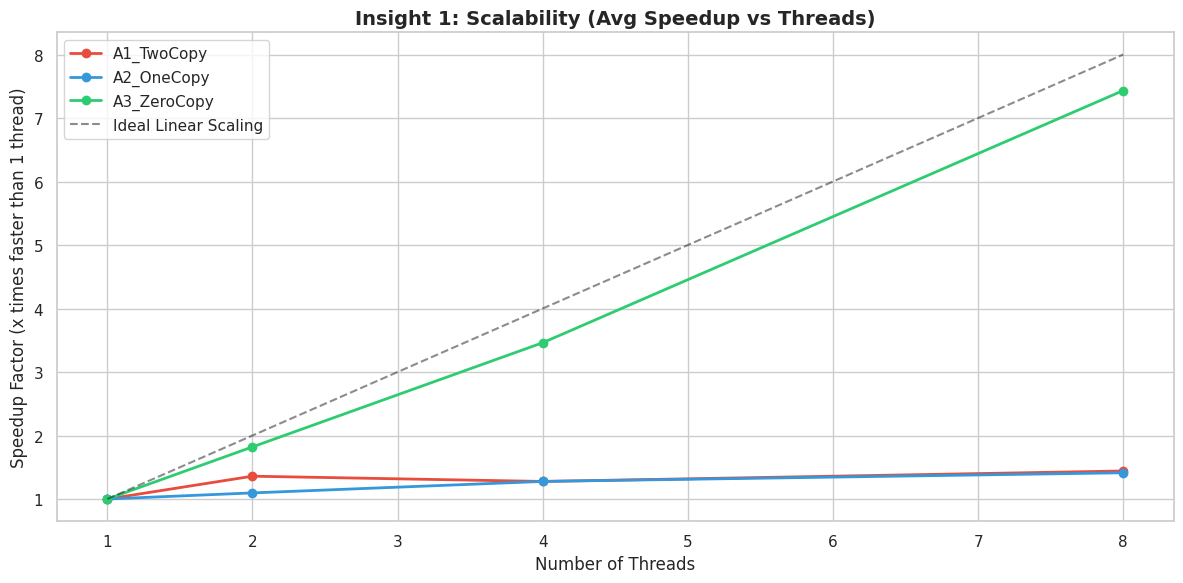

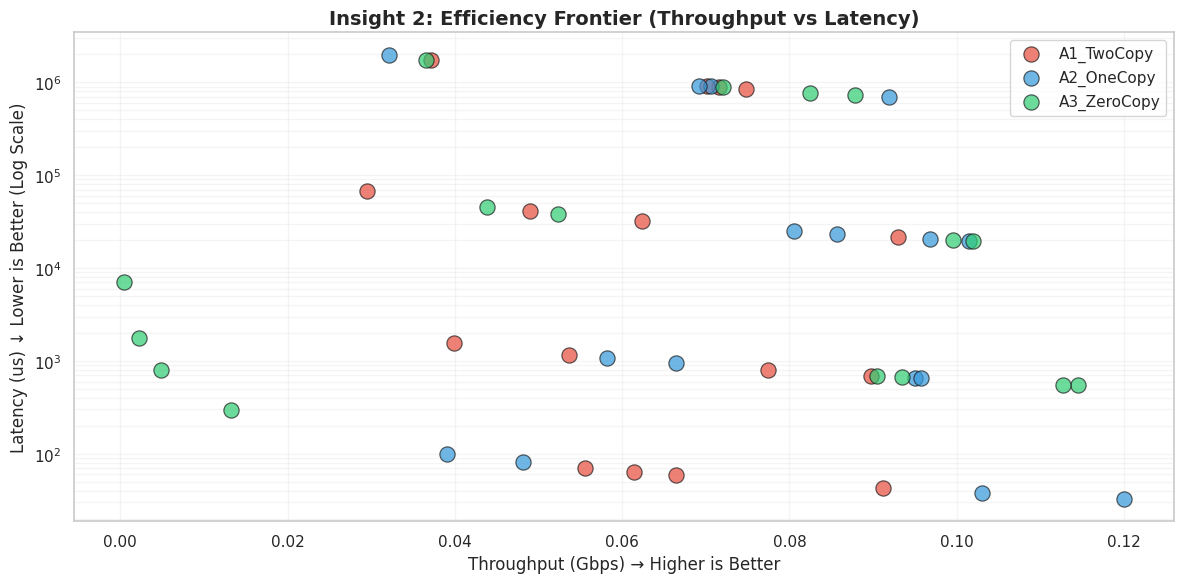

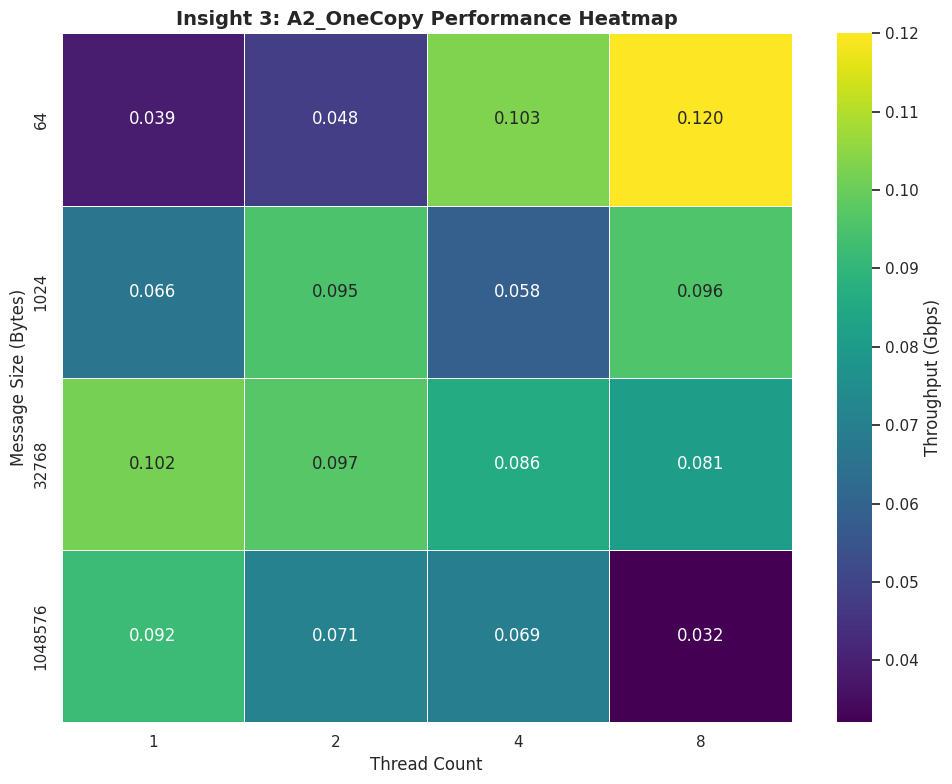

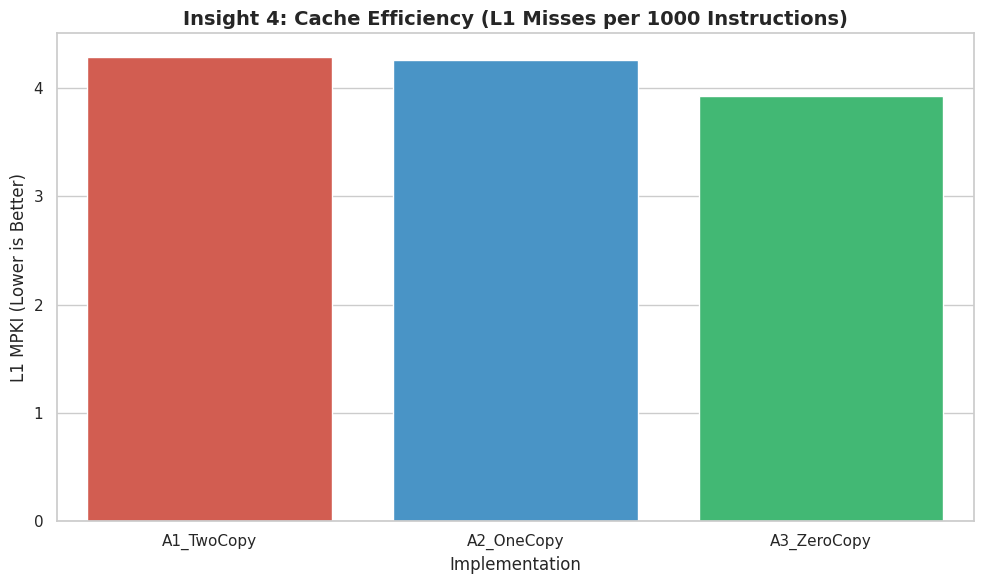

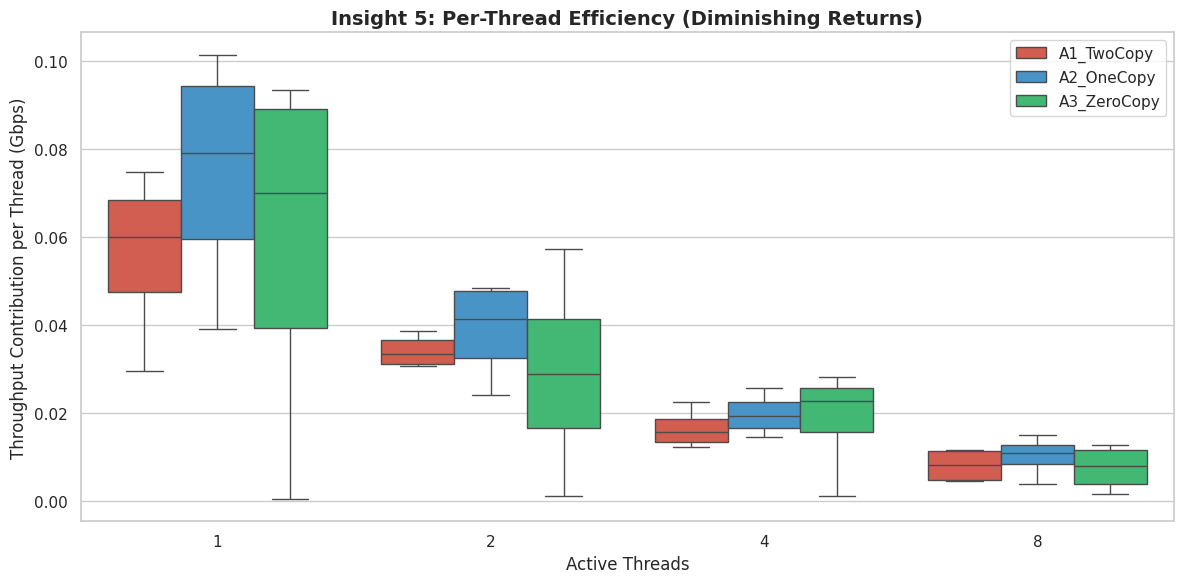

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import numpy as np

# ==========================================
# 1. DATA PROCESSING
# ==========================================
# (Assuming client_data_hardcoded, a1_perf_raw, a2_perf_raw, a3_perf_raw are defined in your previous cell)
# If not, please verify the variables are in memory.

# Load Client Data
client_df = pd.DataFrame(client_data_hardcoded)

# Load Perf Data
def parse_perf_data(name, raw_str):
    cols = ['Time', 'CounterValue', 'Unit', 'EventName', 'RunTime', 'Percentage', 'MetricValue', 'MetricUnit']
    try:
        df = pd.read_csv(io.StringIO(raw_str), names=cols, header=0, on_bad_lines='skip')
        df['Implementation'] = name
        df['CounterValue'] = pd.to_numeric(df['CounterValue'], errors='coerce')
        return df
    except Exception as e:
        print(f"Error parsing {name}: {e}")
        return pd.DataFrame()

perf_dfs = [
    parse_perf_data('A1_TwoCopy', a1_perf_raw),
    parse_perf_data('A2_OneCopy', a2_perf_raw),
    parse_perf_data('A3_ZeroCopy', a3_perf_raw)
]
perf_full_df = pd.concat(perf_dfs)

# Set global style
sns.set_theme(style="whitegrid")
colors = {'A1_TwoCopy': '#e74c3c', 'A2_OneCopy': '#3498db', 'A3_ZeroCopy': '#2ecc71'}

# ==========================================
# 2. GENERATE INSIGHT PLOTS
# ==========================================

# --- Plot 1: Scalability (Speedup Factor) ---
# Shows if adding threads actually multiplies performance linearly.
plt.figure(figsize=(12, 6))
for impl in client_df['Implementation'].unique():
    impl_data = client_df[client_df['Implementation'] == impl].copy()
    scalability_list = []
    # Calculate speedup relative to 1 thread for each message size
    for msg_size in impl_data['MessageSize'].unique():
        subset = impl_data[impl_data['MessageSize'] == msg_size]
        base_tput = subset[subset['Threads'] == 1]['Throughput(Gbps)'].values
        if len(base_tput) > 0:
            subset['Speedup'] = subset['Throughput(Gbps)'] / base_tput[0]
            scalability_list.append(subset)

    if scalability_list:
        scaled_df = pd.concat(scalability_list)
        avg_speedup = scaled_df.groupby('Threads')['Speedup'].mean()
        plt.plot(avg_speedup.index, avg_speedup.values, marker='o', linewidth=2, label=impl, color=colors[impl])

plt.plot([1, 8], [1, 8], 'k--', alpha=0.5, label='Ideal Linear Scaling')
plt.title('Insight 1: Scalability (Avg Speedup vs Threads)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup Factor (x times faster than 1 thread)')
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot 2: Efficiency Frontier (Throughput vs Latency) ---
# Identifies the "knee" where latency spikes. Best points are bottom-right.
plt.figure(figsize=(12, 6))
for impl in client_df['Implementation'].unique():
    subset = client_df[client_df['Implementation'] == impl]
    sns.scatterplot(data=subset, x='Throughput(Gbps)', y='Latency(us)',
                    label=impl, color=colors[impl], s=120, alpha=0.7, edgecolor='k')

plt.yscale('log')
plt.title('Insight 2: Efficiency Frontier (Throughput vs Latency)', fontsize=14, fontweight='bold')
plt.xlabel('Throughput (Gbps) → Higher is Better')
plt.ylabel('Latency (us) ↓ Lower is Better (Log Scale)')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot 3: Performance Heatmap (A2_OneCopy) ---
# Visualizes the "Sweet Spot" for the most balanced implementation.
pivot_df = client_df[client_df['Implementation'] == 'A2_OneCopy'].pivot_table(
    index='MessageSize', columns='Threads', values='Throughput(Gbps)'
)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt='.3f', linewidths=.5, cbar_kws={'label': 'Throughput (Gbps)'})
plt.title('Insight 3: A2_OneCopy Performance Heatmap', fontsize=14, fontweight='bold')
plt.ylabel('Message Size (Bytes)')
plt.xlabel('Thread Count')
plt.tight_layout()
plt.show()

# --- Plot 4: CPU Cache Health (MPKI) ---
# Calculates Misses Per Kilo-Instruction from the Perf data.
metrics = []
for impl in perf_full_df['Implementation'].unique():
    subset = perf_full_df[perf_full_df['Implementation'] == impl]
    misses = subset[subset['EventName'].str.contains('L1-dcache-load-misses', na=False)]['CounterValue'].sum()
    instr = subset[subset['EventName'].str.contains('instructions', na=False)]['CounterValue'].sum()
    if instr > 0:
        mpki = (misses / instr) * 1000
        metrics.append({'Implementation': impl, 'MPKI': mpki})

metric_df = pd.DataFrame(metrics)
plt.figure(figsize=(10, 6))
sns.barplot(data=metric_df, x='Implementation', y='MPKI', palette=colors)
plt.title('Insight 4: Cache Efficiency (L1 Misses per 1000 Instructions)', fontsize=14, fontweight='bold')
plt.ylabel('L1 MPKI (Lower is Better)')
plt.tight_layout()
plt.show()

# --- Plot 5: Per-Thread Efficiency ---
# Shows if threads interfere with each other (Contention).
plt.figure(figsize=(12, 6))
client_df['PerThreadTput'] = client_df['Throughput(Gbps)'] / client_df['Threads']
sns.boxplot(data=client_df, x='Threads', y='PerThreadTput', hue='Implementation', palette=colors)
plt.title('Insight 5: Per-Thread Efficiency (Diminishing Returns)', fontsize=14, fontweight='bold')
plt.ylabel('Throughput Contribution per Thread (Gbps)')
plt.xlabel('Active Threads')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

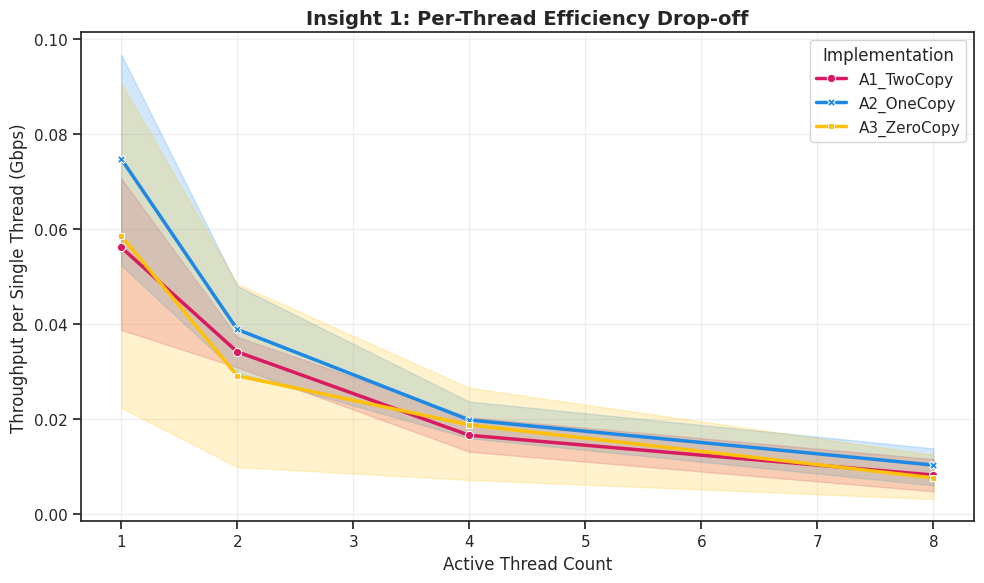

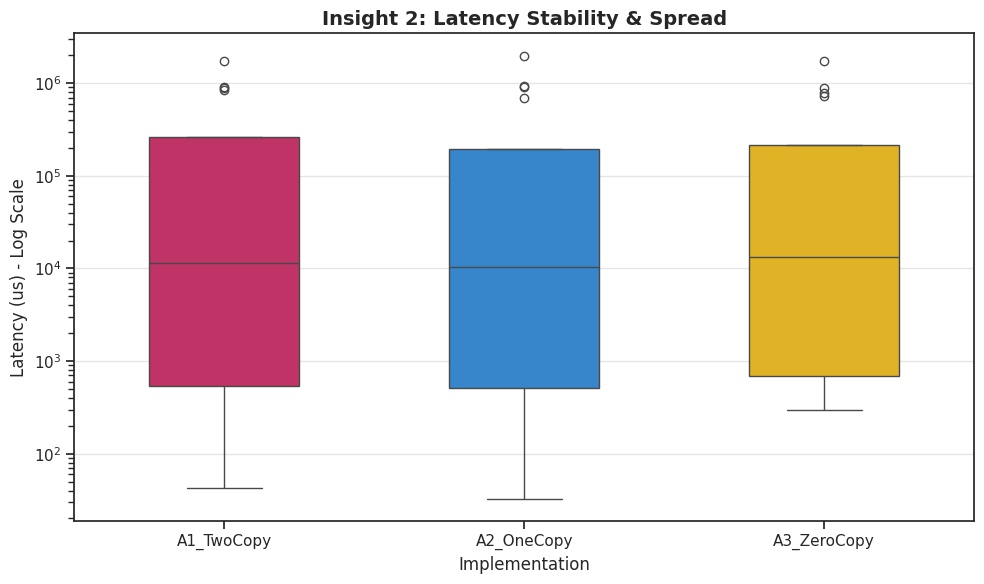

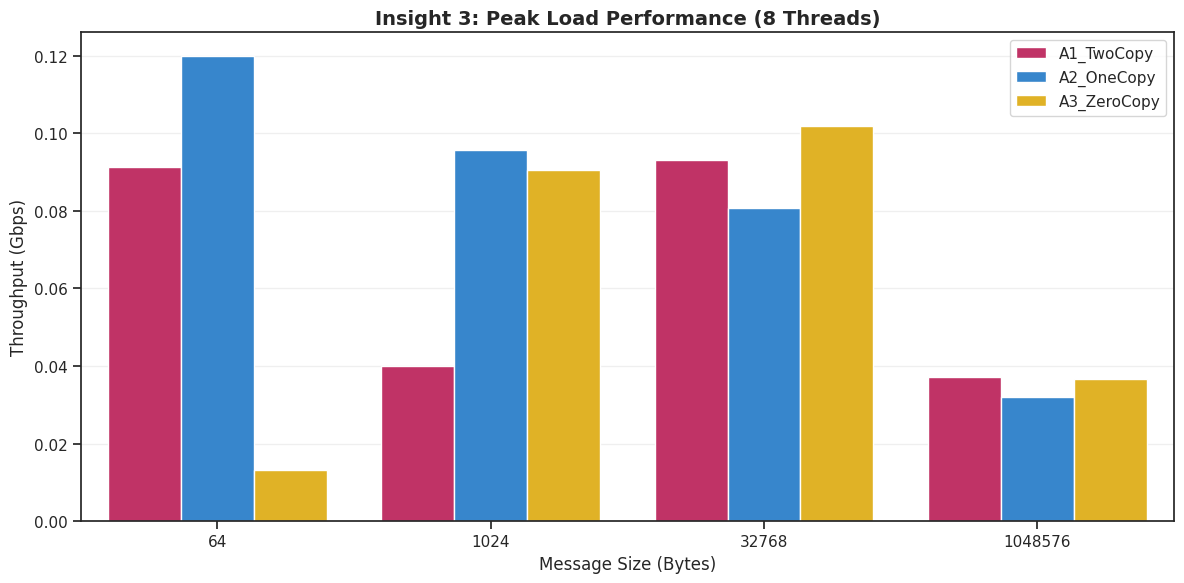

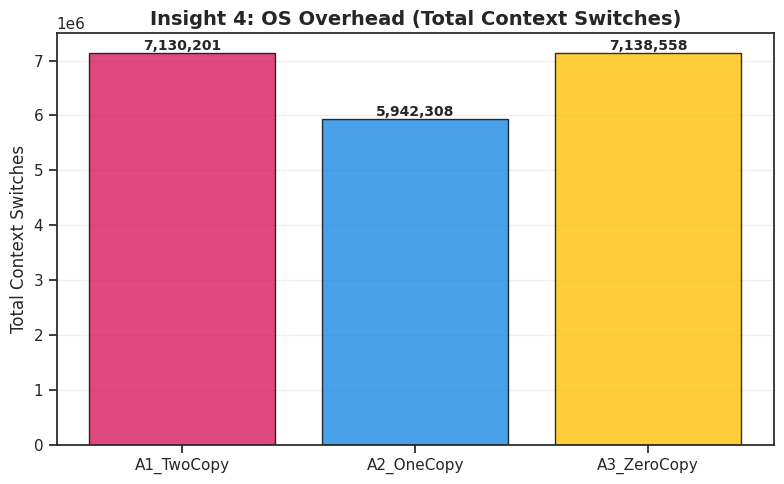

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io

# ==========================================
# 1. PREPARE DATA
# ==========================================
# Re-load client dataframe from your hardcoded list
client_df = pd.DataFrame(client_data_hardcoded)

# Helper to parse the raw perf strings (safely handling potential format issues)
def get_perf_metric(raw_str, metric_name):
    try:
        # Read as CSV
        df = pd.read_csv(io.StringIO(raw_str),
                         names=['Time', 'CounterValue', 'Unit', 'EventName', 'RunTime', 'Percentage', 'MetricValue', 'MetricUnit'],
                         header=0, on_bad_lines='skip')
        # Filter for the specific event/metric
        subset = df[df['EventName'].str.contains(metric_name, case=False, na=False)]
        # Convert to numeric and sum
        total = pd.to_numeric(subset['CounterValue'], errors='coerce').sum()
        return total
    except Exception:
        return 0

# Extract Context Switches for Plot 4
ctx_switches = {
    'A1_TwoCopy': get_perf_metric(a1_perf_raw, 'context-switches'),
    'A2_OneCopy': get_perf_metric(a2_perf_raw, 'context-switches'),
    'A3_ZeroCopy': get_perf_metric(a3_perf_raw, 'context-switches')
}

# Set Visual Style
sns.set_theme(style="ticks", context="notebook")
colors = {'A1_TwoCopy': '#D81B60', 'A2_OneCopy': '#1E88E5', 'A3_ZeroCopy': '#FFC107'}

# ==========================================
# 2. GENERATE PLOTS
# ==========================================

# --- Plot 1: The "Scalability Trap" (Per-Thread Efficiency) ---
# Insight: If 8 threads provide 8x throughput, the line is flat.
# If the line drops steeply, adding threads is yielding diminishing returns.
plt.figure(figsize=(10, 6))
client_df['Efficiency'] = client_df['Throughput(Gbps)'] / client_df['Threads']

sns.lineplot(data=client_df, x='Threads', y='Efficiency', hue='Implementation',
             style='Implementation', markers=True, dashes=False, palette=colors, linewidth=2.5)

plt.title('Insight 1: Per-Thread Efficiency Drop-off', fontsize=14, fontweight='bold')
plt.ylabel('Throughput per Single Thread (Gbps)')
plt.xlabel('Active Thread Count')
plt.grid(True, alpha=0.3)
plt.legend(title='Implementation')
plt.tight_layout()
plt.show()

# --- Plot 2: Latency Stability (Box Plot) ---
# Insight: A lower box is faster. A shorter box is more stable (predictable).
# Outliers (dots) represent performance hiccups.
plt.figure(figsize=(10, 6))

sns.boxplot(data=client_df, x='Implementation', y='Latency(us)', palette=colors, width=0.5)

plt.yscale('log')
plt.title('Insight 2: Latency Stability & Spread', fontsize=14, fontweight='bold')
plt.ylabel('Latency (us) - Log Scale')
plt.xlabel('Implementation')
plt.grid(True, axis='y', which='major', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Plot 3: Peak Load Performance (8 Threads Only) ---
# Insight: At maximum system load (8 threads), which implementation wins
# across different message sizes?
plt.figure(figsize=(12, 6))
subset_8t = client_df[client_df['Threads'] == 8]

sns.barplot(data=subset_8t, x='MessageSize', y='Throughput(Gbps)', hue='Implementation', palette=colors)

plt.title('Insight 3: Peak Load Performance (8 Threads)', fontsize=14, fontweight='bold')
plt.ylabel('Throughput (Gbps)')
plt.xlabel('Message Size (Bytes)')
plt.legend(loc='upper right')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# --- Plot 4: System Overhead (Context Switches) ---
# Insight: High context switches mean the CPU is wasting time switching tasks
# instead of processing data. Lower is usually better for efficiency.
plt.figure(figsize=(8, 5))
names = list(ctx_switches.keys())
values = list(ctx_switches.values())

bars = plt.bar(names, values, color=[colors[n] for n in names], edgecolor='black', alpha=0.8)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Insight 4: OS Overhead (Total Context Switches)', fontsize=14, fontweight='bold')
plt.ylabel('Total Context Switches')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

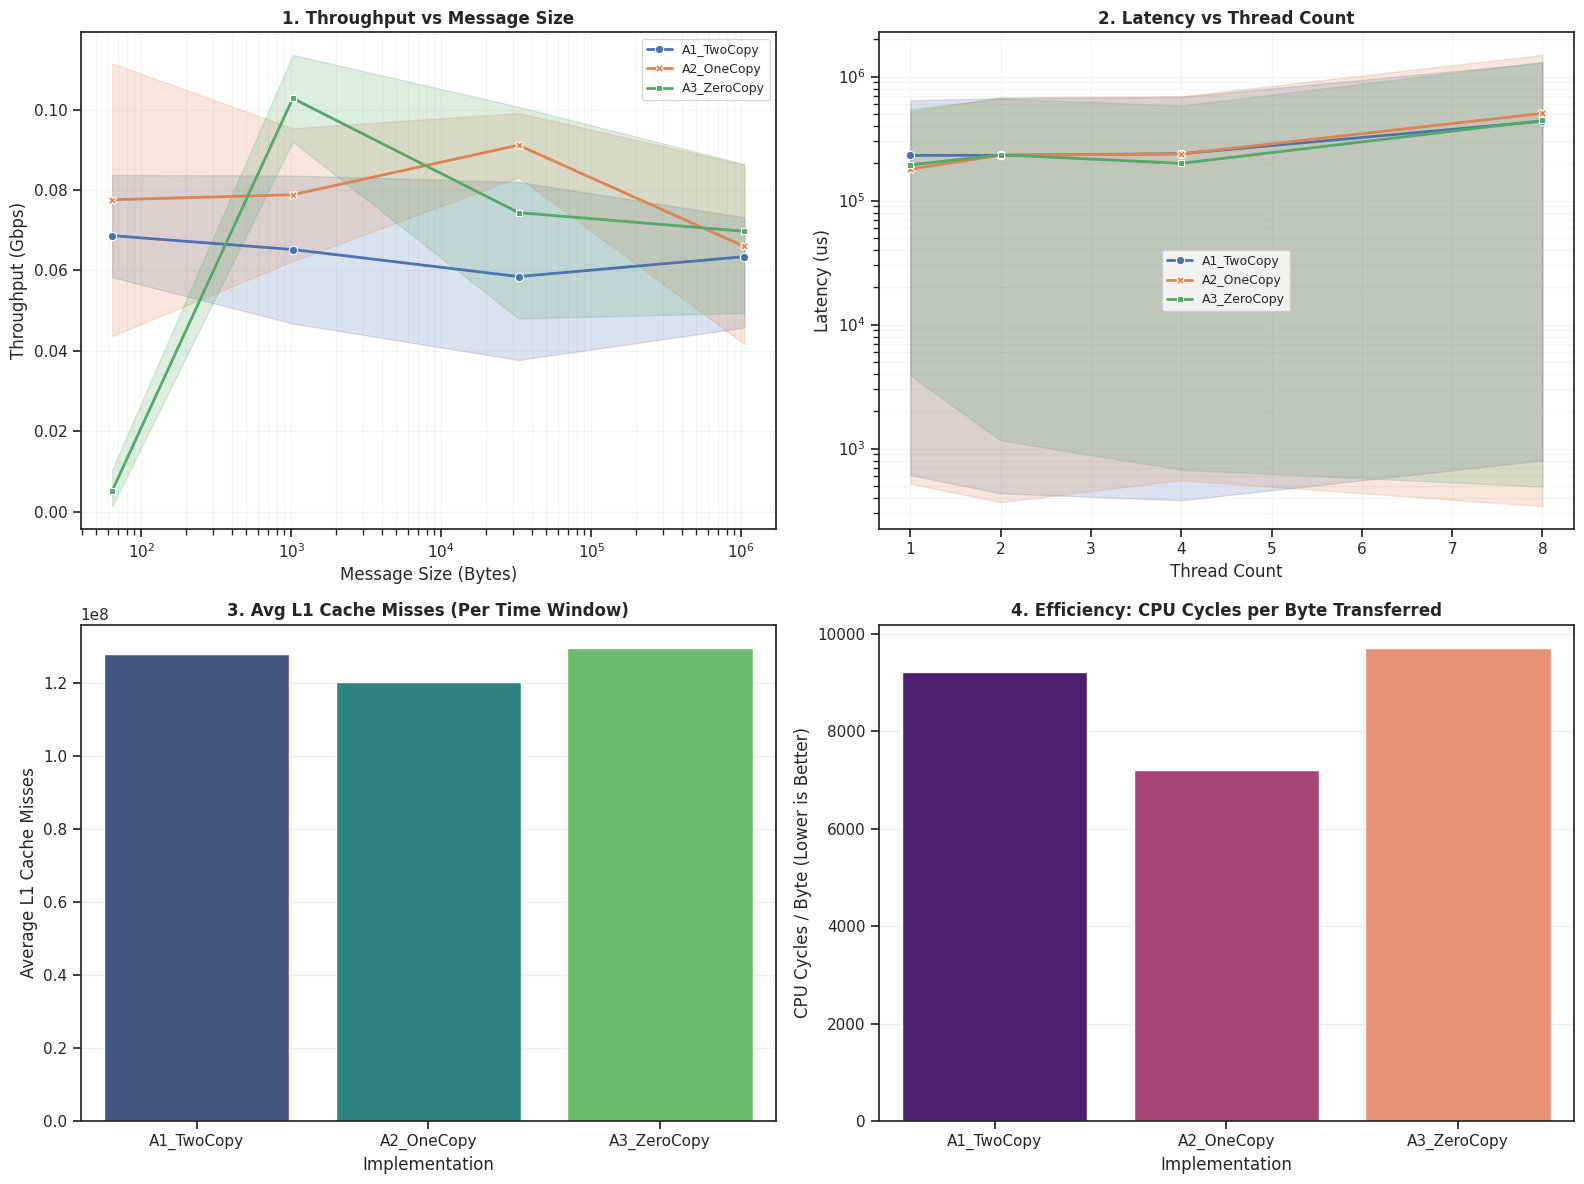

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ==========================================
# 1. PLOT GENERATION
# ==========================================
# (Data is assumed to be loaded in 'client_df' and 'perf_full_df' from previous cells)

# Set up a 2x2 grid for the 4 plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.25)

# --- Plot 1: Throughput vs Message Size ---
sns.lineplot(ax=axes[0, 0], data=client_df, x='MessageSize', y='Throughput(Gbps)',
             hue='Implementation', style='Implementation', markers=True, dashes=False, linewidth=2)
axes[0, 0].set_title('1. Throughput vs Message Size', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Message Size (Bytes)')
axes[0, 0].set_ylabel('Throughput (Gbps)')
axes[0, 0].set_xscale('log')
axes[0, 0].grid(True, which="both", ls="-", alpha=0.2)
axes[0, 0].legend(fontsize=9)

# --- Plot 2: Latency vs Thread Count ---
sns.lineplot(ax=axes[0, 1], data=client_df, x='Threads', y='Latency(us)',
             hue='Implementation', style='Implementation', markers=True, dashes=False, linewidth=2)
axes[0, 1].set_title('2. Latency vs Thread Count', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Thread Count')
axes[0, 1].set_ylabel('Latency (us)')
axes[0, 1].set_yscale('log')  # Log scale for latency handles spikes better
axes[0, 1].grid(True, which="both", ls="-", alpha=0.2)
axes[0, 1].legend(fontsize=9)

# --- Plot 3: Cache Misses (Aggregated per Implementation) ---
# Note: Since Perf data is time-series and not per-message, we plot the Aggregate Rate.
metrics = []
for impl in perf_full_df['Implementation'].unique():
    subset = perf_full_df[perf_full_df['Implementation'] == impl]
    # Sum of all L1 cache misses found in the logs
    total_misses = subset[subset['EventName'].str.contains('L1-dcache-load-misses', na=False)]['CounterValue'].sum()
    # Average across the time windows to get a "Per Second" rate
    count = subset['Time'].nunique()
    if count > 0:
        metrics.append({'Implementation': impl, 'AvgMisses': total_misses / count})

miss_df = pd.DataFrame(metrics)
sns.barplot(ax=axes[1, 0], data=miss_df, x='Implementation', y='AvgMisses', palette='viridis')
axes[1, 0].set_title('3. Avg L1 Cache Misses (Per Time Window)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Average L1 Cache Misses')
axes[1, 0].set_xlabel('Implementation')
axes[1, 0].grid(axis='y', alpha=0.3)

# --- Plot 4: CPU Cycles per Byte Transferred ---
# Calculation: (Cycles / sec) / (Bytes / sec)
cycles_byte_data = []
for impl in client_df['Implementation'].unique():
    # 1. Get Avg Cycles/sec from Perf Data
    perf_subset = perf_full_df[perf_full_df['Implementation'] == impl]
    total_cycles = perf_subset[perf_subset['EventName'].str.contains('cycles', na=False)]['CounterValue'].sum()
    time_windows = perf_subset['Time'].nunique()
    avg_cycles_sec = total_cycles / time_windows if time_windows > 0 else 0

    # 2. Get Avg Bytes/sec from Client Data
    # Gbps -> Bytes/sec:  (Gbps * 1e9) / 8
    client_subset = client_df[client_df['Implementation'] == impl]
    avg_tput_gbps = client_subset['Throughput(Gbps)'].mean()
    avg_bytes_sec = (avg_tput_gbps * 1e9) / 8

    # 3. Calculate Ratio
    if avg_bytes_sec > 0:
        cpb = avg_cycles_sec / avg_bytes_sec
        cycles_byte_data.append({'Implementation': impl, 'CyclesPerByte': cpb})

cpb_df = pd.DataFrame(cycles_byte_data)
sns.barplot(ax=axes[1, 1], data=cpb_df, x='Implementation', y='CyclesPerByte', palette='magma')
axes[1, 1].set_title('4. Efficiency: CPU Cycles per Byte Transferred', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('CPU Cycles / Byte (Lower is Better)')
axes[1, 1].set_xlabel('Implementation')
axes[1, 1].grid(axis='y', alpha=0.3)

# Final Layout Adjustments
plt.tight_layout()
plt.show()

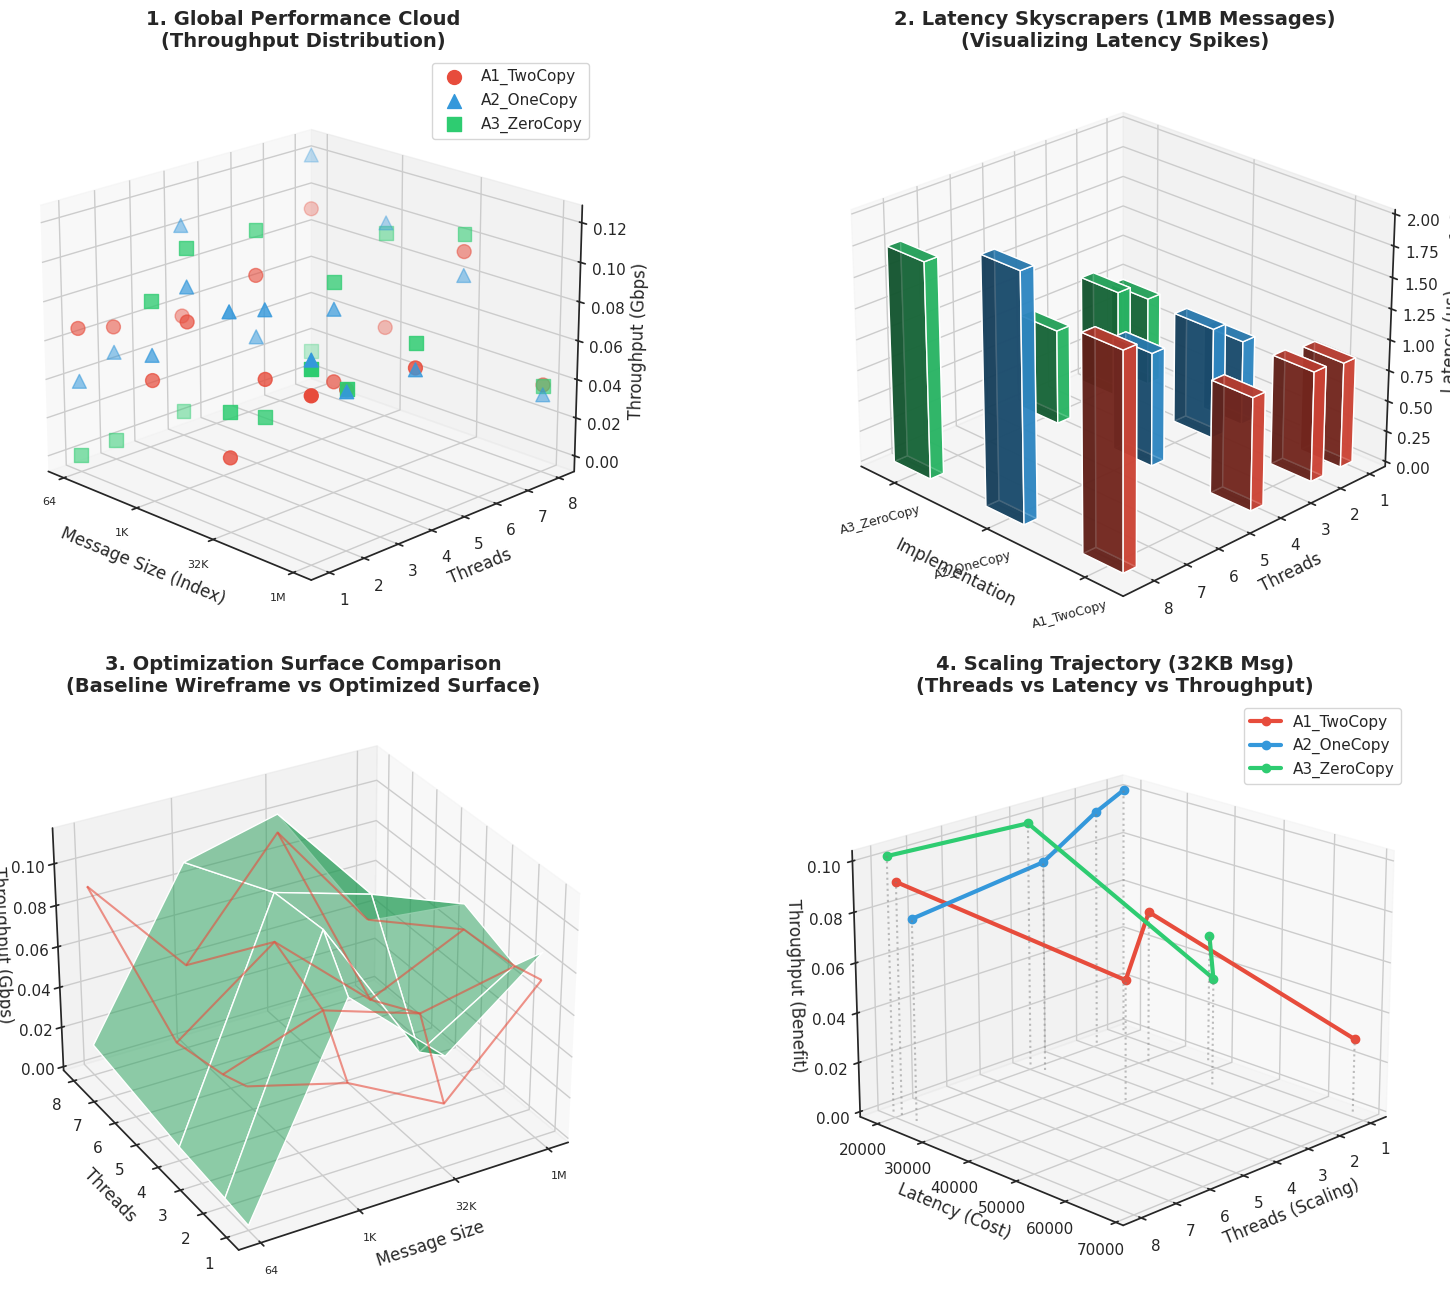

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

# ==========================================
# 3D PLOTTING SETUP
# ==========================================
# Ensure data is loaded
if 'client_df' not in locals():
    print("Error: Please run the cell defining 'client_df' first!")
else:
    # Set up the figure area
    fig = plt.figure(figsize=(20, 16))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    # Define mapping for categorical data (Message Sizes) to linear indices for plotting
    unique_sizes = sorted(client_df['MessageSize'].unique())
    size_map = {size: i for i, size in enumerate(unique_sizes)}
    client_df['SizeIndex'] = client_df['MessageSize'].map(size_map)

    # Colors for implementations
    colors = {'A1_TwoCopy': '#e74c3c', 'A2_OneCopy': '#3498db', 'A3_ZeroCopy': '#2ecc71'}
    markers = {'A1_TwoCopy': 'o', 'A2_OneCopy': '^', 'A3_ZeroCopy': 's'}

    # ---------------------------------------------------------
    # PLOT 1: The "Performance Cloud" (3D Scatter)
    # X=Message Size Index, Y=Threads, Z=Throughput
    # ---------------------------------------------------------
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')

    for impl, color in colors.items():
        subset = client_df[client_df['Implementation'] == impl]
        ax1.scatter(subset['SizeIndex'], subset['Threads'], subset['Throughput(Gbps)'],
                   c=color, label=impl, s=100, depthshade=True, marker=markers[impl])

    ax1.set_title('1. Global Performance Cloud\n(Throughput Distribution)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Message Size (Index)')
    ax1.set_ylabel('Threads')
    ax1.set_zlabel('Throughput (Gbps)')
    ax1.set_xticks(range(len(unique_sizes)))
    ax1.set_xticklabels(['64', '1K', '32K', '1M'], fontsize=8)
    ax1.view_init(elev=20, azim=-45)
    ax1.legend()

    # ---------------------------------------------------------
    # PLOT 2: The "Latency Skyscrapers" (3D Bar Chart)
    # Visualizing Latency for Large Messages (1MB) across Threads
    # ---------------------------------------------------------
    ax2 = fig.add_subplot(2, 2, 2, projection='3d')

    # Filter for just the largest message size (1048576)
    subset_large = client_df[client_df['MessageSize'] == 1048576].copy()

    # Create integer mappings for X (Implementation) and Y (Threads)
    impl_map = {name: i for i, name in enumerate(colors.keys())}

    for i, row in subset_large.iterrows():
        x = impl_map[row['Implementation']]
        y = row['Threads']
        z = 0
        dx = 0.4
        dy = 0.4
        dz = row['Latency(us)']

        ax2.bar3d(x, y, z, dx, dy, dz, color=colors[row['Implementation']], alpha=0.8)

    ax2.set_title('2. Latency Skyscrapers (1MB Messages)\n(Visualizing Latency Spikes)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Implementation')
    ax2.set_ylabel('Threads')
    ax2.set_zlabel('Latency (us)')
    ax2.set_xticks([0.2, 1.2, 2.2])
    ax2.set_xticklabels(list(colors.keys()), fontsize=9, rotation=15)
    ax2.view_init(elev=25, azim=135)

    # ---------------------------------------------------------
    # PLOT 3: The "Optimization Surface" (Wireframe)
    # Comparing A1 (Baseline) vs A3 (Optimized) Surfaces
    # ---------------------------------------------------------
    ax3 = fig.add_subplot(2, 2, 3, projection='3d')

    # Function to create grid data for wireframe
    def get_grid(impl_name):
        sub = client_df[client_df['Implementation'] == impl_name]
        return sub.pivot(index='Threads', columns='SizeIndex', values='Throughput(Gbps)')

    # Plot A1 (Red Wireframe)
    Z1 = get_grid('A1_TwoCopy').values
    X1, Y1 = np.meshgrid(range(len(unique_sizes)), sorted(client_df['Threads'].unique()))
    ax3.plot_wireframe(X1, Y1, Z1, color=colors['A1_TwoCopy'], alpha=0.6, label='A1 (Base)')

    # Plot A3 (Green Surface)
    Z3 = get_grid('A3_ZeroCopy').values
    ax3.plot_surface(X1, Y1, Z3, color=colors['A3_ZeroCopy'], alpha=0.5, label='A3 (Optimized)')

    ax3.set_title('3. Optimization Surface Comparison\n(Baseline Wireframe vs Optimized Surface)', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Message Size')
    ax3.set_ylabel('Threads')
    ax3.set_zlabel('Throughput (Gbps)')
    ax3.set_xticks(range(len(unique_sizes)))
    ax3.set_xticklabels(['64', '1K', '32K', '1M'], fontsize=8)
    ax3.view_init(elev=30, azim=-120)

    # ---------------------------------------------------------
    # PLOT 4: The "Scaling Trajectory" (3D Line Plot)
    # Tracing the path of Latency vs Throughput as Threads increase
    # ---------------------------------------------------------
    ax4 = fig.add_subplot(2, 2, 4, projection='3d')

    for impl, color in colors.items():
        # Plot trajectory for a medium message size (32768)
        subset = client_df[(client_df['Implementation'] == impl) & (client_df['MessageSize'] == 32768)]
        subset = subset.sort_values('Threads')

        ax4.plot(subset['Threads'], subset['Latency(us)'], subset['Throughput(Gbps)'],
                color=color, linewidth=3, marker='o', markersize=6, label=impl)

        # Draw "shadow" lines to the floor (Z=0) to anchor the eye
        for _, row in subset.iterrows():
            ax4.plot([row['Threads'], row['Threads']], [row['Latency(us)'], row['Latency(us)']], [0, row['Throughput(Gbps)']],
                    color='gray', linestyle=':', alpha=0.5)

    ax4.set_title('4. Scaling Trajectory (32KB Msg)\n(Threads vs Latency vs Throughput)', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Threads (Scaling)')
    ax4.set_ylabel('Latency (Cost)')
    ax4.set_zlabel('Throughput (Benefit)')
    ax4.view_init(elev=20, azim=45)
    ax4.legend()

    plt.tight_layout()
    plt.show()